### **1. Data Collection**

In [16]:
#import the essential libraries
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
#import the dataset
train_dataset = pd.read_csv('./dataset/train_data.csv')
test_dataset = pd.read_csv('./dataset/test_data.csv')
#copy of training dataset excluding the last column
train_input = train_dataset.iloc[:, :-1].values
#copy of last column from training dataset
train_output = train_dataset.iloc[:, -1].values
#copy of testing dataset excluding the last column
test_input = test_dataset.iloc[:, :-1].values
#copy of last column from testing dataset
test_output = test_dataset.iloc[:, -1].values

### **2. Min-Max normalization**

In [17]:
scaler = MinMaxScaler()
scaler.fit(train_input)
train_input = scaler.transform(train_input)
test_input = scaler.transform(test_input)

### **3. Model/hypothesis represenation**

In [18]:
def hypothesis(sample, parameter):
  pred_output = parameter[0]#calculate theta0*x0 (x0 value is 1)
  for n in range(len(sample)):#calculate the number of features
    pred_output += parameter[n+1] * float((sample[n])) #calculate theta1*x1 + theta2*x2 .. . .thetan*xn
  return 1 / (1 + math.exp(-pred_output))

### **4. Cost function**

In [19]:
def cost(pred_output,actual_output):
  error = (pred_output - float(actual_output))
  total_cost = -(actual_output*np.log(pred_output))+(-(1-actual_output)*np.log(1-pred_output)) #total cost calculation
  return error,total_cost #error value is for parameter updation and total_cost is to measure the average error at every epoch

### **5. Optimization of model parameters**

In [20]:
def gradient_descent(error,parameters,learning_rate,sample):
  parameters[0] = parameters[0] - (learning_rate * error) #update theta0
  for n in range(sample.size): #calculate the number of features
    parameters[n + 1] = parameters[n + 1] - (learning_rate * error * float(sample[n])) #update theta1, theta2, , ,, depending upon the number of features
  return parameters #return the updated paremeters

### **6. Gradient descent:**

In [21]:
def optimization(training_input,training_output,testing_input,testing_output,learning_rate,parameters,epochs):
  best_error = 99999999999
  best_epoch = 0
  best_train_accuracy = 0
  best_test_accuracy = 0
  best_parameters = 0
  for epoch in range(epochs):
    train_cost = 0
    test_cost = 0
    for sample, actutal_output in zip(training_input,training_output):#iterate through the training dataset
      predicted_output = hypothesis(sample,parameters) #calculate the per sample predicted output
      error,total_cost = cost(predicted_output,actutal_output) #calculate error for each training sample
      parameters = gradient_descent(error,parameters,learning_rate,sample) #update the model parameters
    train_accuracy, training_cost = eval_model(training_input,training_output,parameters)
    train_cost = (training_cost/len(train_input)) #average error
    train_cost_list.append(train_cost) #append the total error from every epoch to list
    train_accuracy_list.append(train_accuracy)
    test_accuracy, testing_cost = eval_model(testing_input,testing_output,parameters) #calculate the error for every testing sample
    test_cost = (testing_cost/len(testing_input)) #sumup the error from each testing sample
    test_cost_list.append(test_cost) #append the total error from every epoch to list
    test_accuracy_list.append(test_accuracy)
    if ((epoch+1)%1000==0): #print training progress after every 1000 epochs and replace 1000 by 1 to print progress after every epoch
       print("Epoch:",epoch+1, "Training error:",train_cost, "Testing error:",test_cost,"Train accuarcy:",train_accuracy,"Testing accuarcy:",test_accuracy, "Parameters:",parameters)
    if(best_test_accuracy < test_accuracy): #copy the parameter values along with epoch number, testing error, test and train accuracy for the highest test accuracy during the training
      best_error=test_cost
      best_epoch=epoch+1
      best_parameters = parameters[:]
      best_train_accuracy = train_accuracy
      best_test_accuracy = test_accuracy
  return best_error,best_epoch,best_parameters, best_train_accuracy, best_test_accuracy

### **7. Model testing**

In [22]:
def eval_model(inputs,outputs,parameters):
  correct = 0
  total_cost = 0
  for sample, actutal_output in zip(inputs,outputs):#iterate through the dataset
    predicted_output = hypothesis(sample,parameters)#calculate the per sample predicted output
    if (round(predicted_output)==actutal_output):
      correct+=1
    error,sample_cost = cost(predicted_output,actutal_output)#calculate error for each testing sample
    total_cost += sample_cost #sumup the error from each training sample
  accuracy = (correct/len(inputs))*100
  total_cost = total_cost/len(inputs)
  return accuracy, total_cost

### **8. Model training**

In [23]:
epochs = 10000
learning_rate = 0.0002
#calulate the number of features and initialize all the model parameters to 0
parameters = [0.0 for i in range( len(train_input[0])+1)]
#define the lists for graph plot
train_cost_list = [ ]
train_accuracy_list = [ ]
test_accuracy_list = [ ]
test_cost_list = [ ]
#start the learning algorithm
best_error,best_epoch,best_parameters,best_train_accuracy,best_test_accuracy = optimization(train_input,train_output,test_input,test_output,learning_rate,parameters,epochs)
print("\n\n\n-----------------------------------------------------Training Finished-----------------------------------------------------\n")
print("Best test accuaracy:",best_test_accuracy,"is at epoch:", best_epoch,"with train accuarcy:",best_train_accuracy,"test_error:",best_error, "and with parameters", best_parameters)
print("\n---------------------------------------------------------------------------------------------------------------------------")

Epoch: 1000 Training error: 0.0009004805124261176 Testing error: 0.0034131232876424577 Train accuarcy: 73.89162561576354 Testing accuarcy: 71.25 Parameters: [-2.329310329301874, 0.9227513039462504, 1.8920983939691118, -0.7547894465461735, 0.10754102528301454, 0.5488721666222018, 0.8146392056989059, 0.774618694550216, 0.8975613043084261]
Epoch: 2000 Training error: 0.000845976807802336 Testing error: 0.0031930841399454833 Train accuarcy: 75.53366174055829 Testing accuarcy: 78.125 Parameters: [-3.541716842093086, 1.2277918206917384, 3.082934863983692, -1.0279199084231998, 0.15530392643265076, 0.6405021542851494, 1.6450799730737198, 1.2101147188306078, 1.0252254042310465]
Epoch: 3000 Training error: 0.0008200171825445853 Testing error: 0.003095493287354257 Train accuarcy: 76.35467980295566 Testing accuarcy: 78.125 Parameters: [-4.3764575127515455, 1.3902258954355058, 3.8575132464676893, -1.1556586181432267, 0.14013558789524838, 0.5558068056879106, 2.344707020091758, 1.4735136574075625, 0.

### **9. Graph plots to visualize the training and testing errors**

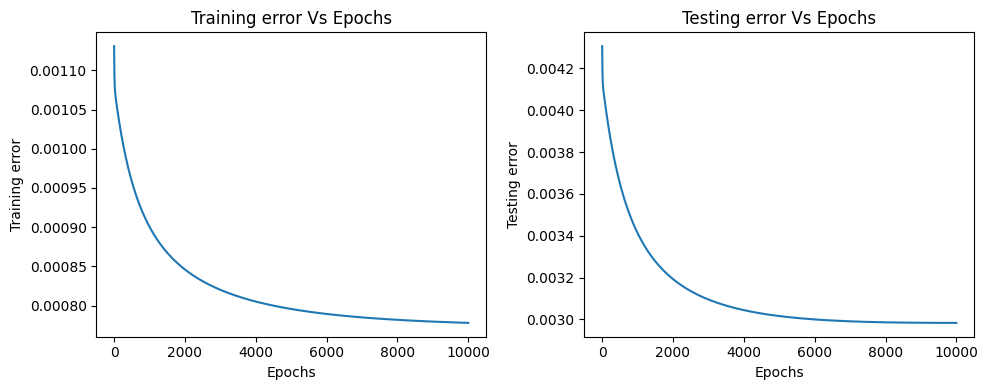

In [24]:
#import the library to plot the graph
import matplotlib.pyplot as plt
#copy the data for plotting
epochs_num = list(range(1, epochs+1))
x = epochs_num
y1 = train_cost_list
y2 = test_cost_list
#create a figure with subplots and specify figsize
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#plot the first subplot for training and add legend and axis labels
axes[0].plot(x, y1)
axes[0].set_title('Training error Vs Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training error')
#plot the second subplot for testing and add legend and axis labels
axes[1].plot(x, y2)
axes[1].set_title('Testing error Vs Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Testing error')
plt.tight_layout()
#show the plots
plt.show()

### **10. Graph plots to visualize the training and testing accuracy**

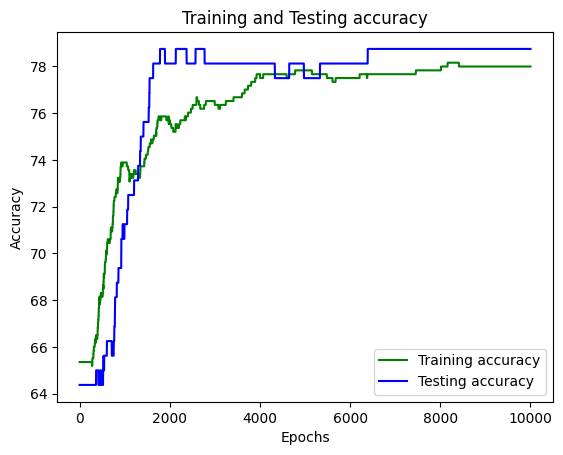

In [25]:
plt.plot(epochs_num, train_accuracy_list, 'g', label='Training accuracy')
plt.plot(epochs_num, test_accuracy_list, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **11. Logistic Regresion with Scikit library**

In [26]:
#import the Logistic Regression and accurcay calculation metric from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#create logistic regression object
model = LogisticRegression()
#train the model using the training dataset
model.fit(train_input, train_output)
#make predictions on the testing data
y_pred = model.predict(test_input)
#calculate the accuracy on testing dataset
accuracy = accuracy_score(test_output, y_pred)
print("The testing accuracy of the model is",accuracy*100)
#make predictions on the training data
y_pred = model.predict(train_input)
#calculate the accuracy on training dataset
accuracy = accuracy_score(train_output, y_pred)
print("The training accuracy of the model is",accuracy*100)

The testing accuracy of the model is 78.125
The training accuracy of the model is 77.33990147783251


### **12. Cross-check whether our accuracy calculation function has correctly predicted the error by substituting the optimized model parameters from our gradient descent algorithm into the scikit model**

In [27]:
#load the parameters with best testing accuracy from our implementation
model.intercept_, model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4], model.coef_[0][5], model.coef_[0][6], model.coef_[0][7] = -3.320876767133666, 1.1805319398626033, 2.8700767098557454, -0.9852342639982549, 0.15240185791118044, 0.6420294034836616, 1.4772869530312023, 1.1352877811767579, 1.0204168092136399
#make predictions on the testing data
y_pred = model.predict(test_input)
#calculate the accuracy on testing dataset
accuracy = accuracy_score(test_output, y_pred)
print("The testing accuracy of the model is",accuracy*100)
#make predictions on the training data
y_pred = model.predict(train_input)
#calculate the accuracy on training dataset
accuracy = accuracy_score(train_output, y_pred)
print("The training accuracy of the model is",accuracy*100)

The testing accuracy of the model is 78.75
The training accuracy of the model is 75.86206896551724
